<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Angewandte Geophysik II: Kap 10: Modellierung
## Synthetic topography
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we create different synthetic topographies.
<img src="images/3Dtopo.png" style="height:10cm">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import lib_modelling
#lib_modelling.change_fontsize()

----
## Create topography

Create topographical data on regular grid, save to file
$$
topo(x,y) = \left\{
\begin{array}{ll}
T_o, & \mbox{flat} \\
T_o+T_a\cos(\frac{\pi x}{50}), & \mbox{cosine} \\
T_o+T_a\sin(\frac{\pi x}{100}), & \mbox{sine} \\
T_o+T_a\sqrt{-\frac{(x-\mu)^2+(y-\mu)^2}{\sigma^2}}, & \mbox{gauss}
\end{array}
\right.
$$

In [2]:
def GP_topo(nx=51,ny=51,To=200,Ta=5,topo_type='flat',mu=0.,sigma=30.):
    xmin=-50;xmax=50
    ymin=-50;ymax=50
    x,dx = np.linspace(xmin,xmax,nx,retstep=True)
    y,dy = np.linspace(ymin,ymax,ny,retstep=True)
    # re-mesh for 2D plot
    X, Y = np.meshgrid(y,x)
    if (topo_type == 'flat'):
        TOPO = To + 0*X
    elif (topo_type == 'cosine'):
        TOPO = To + Ta + Ta*np.cos(np.pi*X/50) + 0*X
    elif (topo_type == 'sine'):
        TOPO = To + Ta + Ta*np.sin(np.pi*X/100) + 0*X
    elif (topo_type == 'gauss'):
        TOPO = To + Ta * np.exp(-((X-mu)**2+(Y-mu)**2)/sigma**2) + 0*X
    else:
        print('No topo type defined')
    ZTOP = 1000.
    Z = ZTOP - TOPO
    return X,Y,TOPO,Z,ZTOP

## Plot 1D cross sections

flat
cosine
sine
gauss


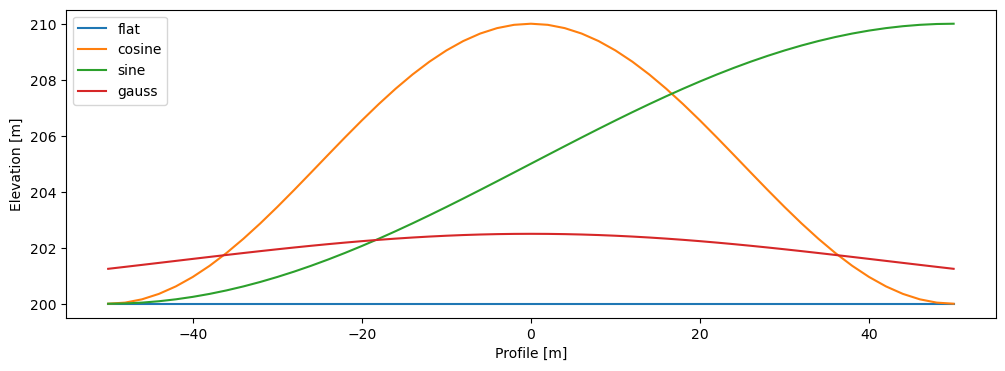

In [19]:
plt.figure(figsize=(12,4))
plt.xlabel('Profile [m]')
plt.ylabel('Elevation [m]')

for topo_type in ['flat','cosine','sine','gauss']:
    print (topo_type)
    X,Y,TOPO,Z,ZTOP = GP_topo(nx=1,ny=51,To=200.,Ta=5.,topo_type=topo_type,sigma=60.)
    plt.plot(X.flatten(),TOPO.flatten(),label=topo_type)
plt.legend()

----
## Plot 2D map

In [20]:
X,Y,TOPO,Z,ZTOP = GP_topo(nx=101,ny=101,To=200.,Ta=5.,topo_type='gauss')

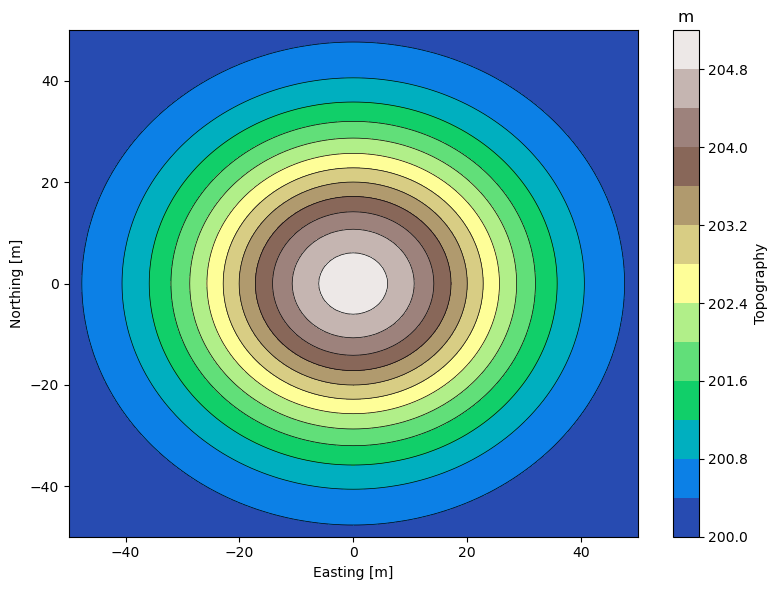

In [21]:
axs = plt.figure(figsize=(8.0,6.0)).add_subplot()
axs.set_xlabel('Easting [m]')
axs.set_ylabel('Northing [m]')
axs.ticklabel_format(useOffset=False)
axs.contour(X,Y,TOPO, 15, linewidths = 0.5, colors = 'k')
im=axs.contourf(X,Y,TOPO, 15,cmap = plt.get_cmap('terrain'))
cbar=plt.colorbar(im,ax=axs)
cbar.ax.set_title('m')
cbar.set_label('Topography')
#ax1.plot([388200,388600],[5809700,5809700],linestyle=':',linewidth=2,color='blue')
#ax1.plot([388200,388600],[5809800,5809800],linestyle=':',linewidth=2,color='red')
#ax1.set_xlim([388200,388600])
#ax1.set_ylim([5809500,5809900])
plt.tight_layout()

----
## Plot profiles

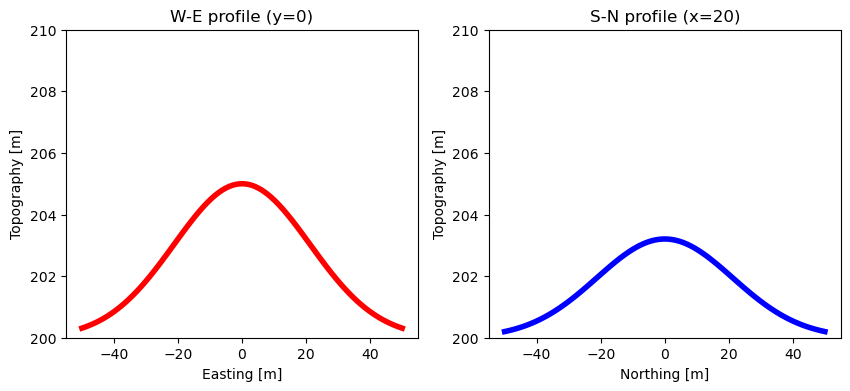

In [41]:
fig,axs = plt.subplots(1,2,figsize=(10,4))
axs[0].set_title('W-E profile (y=0)')
axs[0].set_ylim([200,210])
axs[0].set_xlabel('Easting [m]')
axs[0].set_ylabel('Topography [m]')
axs[0].plot(X[Y==0],TOPO[Y==0],lw=4,color='red')

axs[1].set_title('S-N profile (x=20)')
axs[1].set_ylim([200,210])
axs[1].set_xlabel('Northing [m]')
axs[1].set_ylabel('Topography [m]')
axs[1].plot(Y[X==20],TOPO[X==20],lw=4,color='blue')

----
## Plot 3D map

<IPython.core.display.Javascript object>


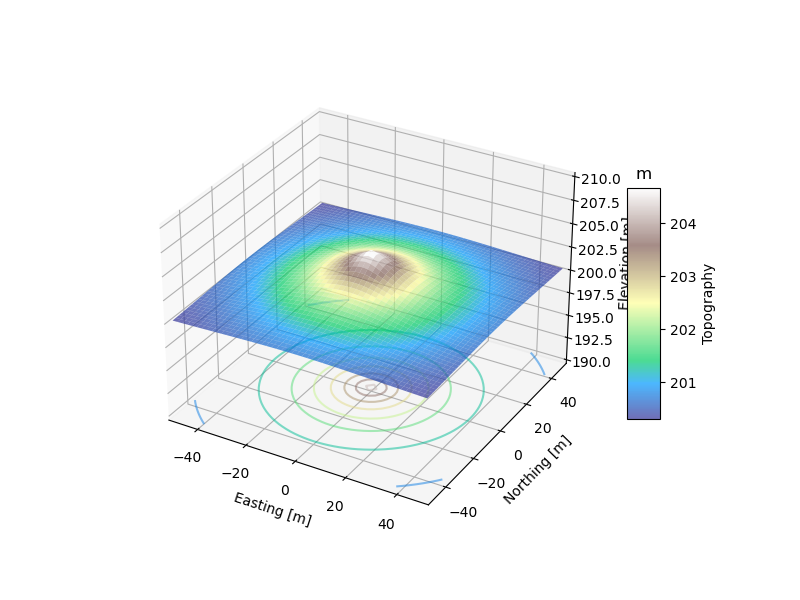

In [5]:
%matplotlib notebook

axs = plt.figure(figsize=(8.0,6.0)).add_subplot(projection='3d')
# 3D axes
axs.set_xlim(X.min(),X.max())
axs.set_ylim(Y.min(),Y.max())
axs.set_zlim(190,210)
axs.set_xlabel('Easting [m]')
axs.set_ylabel('Northing [m]')
axs.set_zlabel('Elevation [m]')

# topography as 2D plot
axs.contour(X,Y,TOPO,zdir='z',offset=190,alpha=0.5,cmap = plt.get_cmap('terrain'))

# topography as 3D surface
surf=axs.plot_surface(X, Y, TOPO,rstride=1, cstride=1, alpha=0.7, linewidth=0,cmap=plt.get_cmap('terrain'))

# colorbar
cbar=plt.colorbar(surf, shrink=0.5, aspect=7)
cbar.ax.set_title('m')
cbar.set_label('Topography')

----
## Save topography to file

In [6]:
outfile = open('data/topo.xyz', 'w')
print(topo_type,file=outfile)
print(nx,ny,dx,dy,file=outfile)
print(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        print("%8.2f %8.2f %8.2f %8.2f" % (X[i,j],Y[i,j],Z[i,j],TOPO[i,j]),file=outfile)

NameError: name 'topo_type' is not defined

... done